# Advanced Plots

## Gráficos Avanzados

Matplotlib es increíblemente versátil, y aunque es más conocido por sus gráficos 2D, también tiene capacidades para la visualización en tres dimensiones. Además, ofrece una variedad de tipos de gráficos especializados que, aunque no se usan a diario, son herramientas poderosas para análisis específicos, como la visualización de incertidumbre, distribuciones o eventos discretos. En esta sección, exploraremos cómo ir más allá de las dos dimensiones y cómo usar algunos de estos gráficos más avanzados.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Step Chart

Un gráfico de escalones (step plot) muestra los datos como una serie de pasos horizontales y verticales. Es útil para visualizar datos que cambian discretamente en el tiempo, como valores de funciones por tramos o cambios de estado. La función `plt.step(x, y, **kwargs)` crea un gráfico de escalones, el argumento `where` Determina dónde ocurre el paso (`'pre'`, `'post'`, `'mid'`).

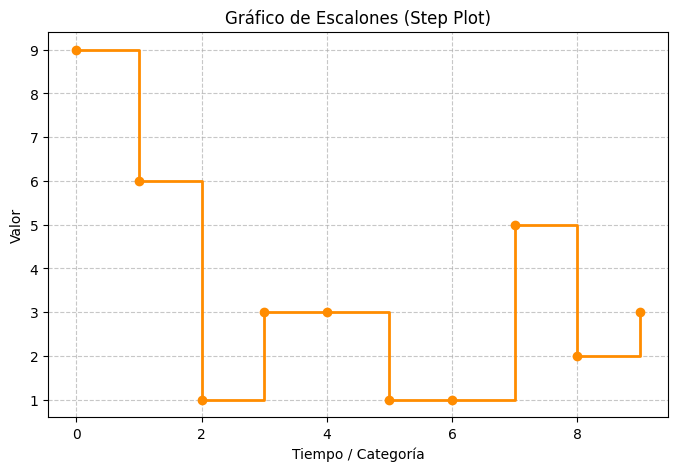

In [2]:
#Datos de ejemplo
x_steps = np.arange(0, 10)
y_steps = np.random.randint(1, 10, size=10)

plt.figure(figsize=(8, 5))
plt.step(x_steps, y_steps, where='post', color='darkorange', linewidth=2, marker='o', markersize=6)
plt.title('Gráfico de Escalones (Step Plot)')
plt.xlabel('Tiempo / Categoría')
plt.ylabel('Valor')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Error Bar Charts

Los gráficos de barras de error son esenciales para visualizar la incertidumbre en las mediciones o cálculos. Muestran la variación esperada o el rango de confianza alrededor de cada punto de datos. La función `plt.errorbar(x, y, yerr=None, xerr=None, fmt='', **kwargs)`: Crea un gráfico de línea o dispersión con barras de error.

- `yerr`: Error en el eje Y (puede ser un escalar, un array o un array de 2xN para errores asimétricos).
- `xerr`: Error en el eje X (similar a `yerr`).
- `fmt`: Formato de la línea y el marcador.
- `ecolor`: Color de las barras de error.
- `capsize`: Tamaño de los *"capuchones"* en los extremos de las barras de error.

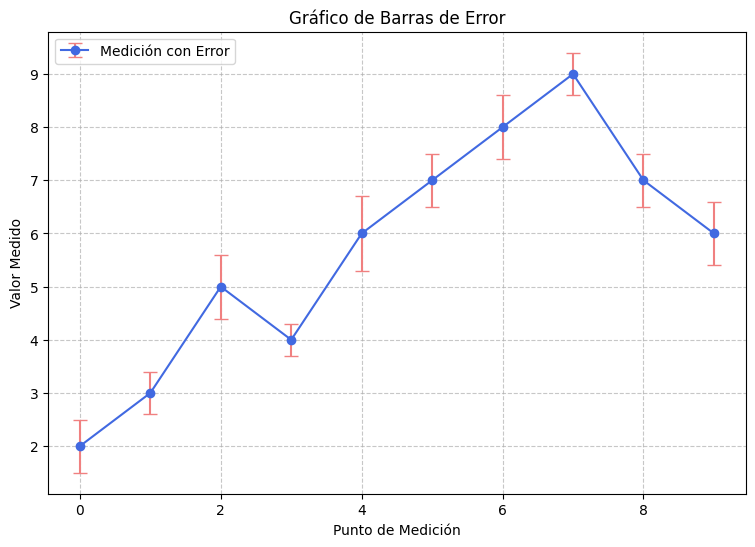

In [3]:
#Datos de ejemplo
x_data = np.arange(0, 10, 1)
y_data = np.array([2, 3, 5, 4, 6, 7, 8, 9, 7, 6])
y_error = np.array([0.5, 0.4, 0.6, 0.3, 0.7, 0.5, 0.6, 0.4, 0.5, 0.6])

plt.figure(figsize=(9, 6))
plt.errorbar(x_data, y_data, yerr=y_error, fmt='-o', color='royalblue',
             ecolor='lightcoral', capsize=5, label='Medición con Error')
plt.title('Gráfico de Barras de Error')
plt.xlabel('Punto de Medición')
plt.ylabel('Valor Medido')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Violin Plot

Los gráficos de violín son una alternativa más rica a los box plots para visualizar la distribución de datos. Muestran la densidad de probabilidad de los datos en diferentes valores, ofreciendo una visión de la forma y la simetría de la distribución. La función `plt.violinplot(dataset, **kwargs)` crea uno o más gráficos de violín.

- `dataset`: Una secuencia de arrays (*uno por violín*) o un array 2D.
- `showmeans`: Muestra la media de cada distribución.
- `showmedians`: Muestra la mediana de cada distribución.
- `showextrema`: Muestra los valores mínimos y máximos.
- `vert`: Si es `True` (por defecto), los violines son verticales.

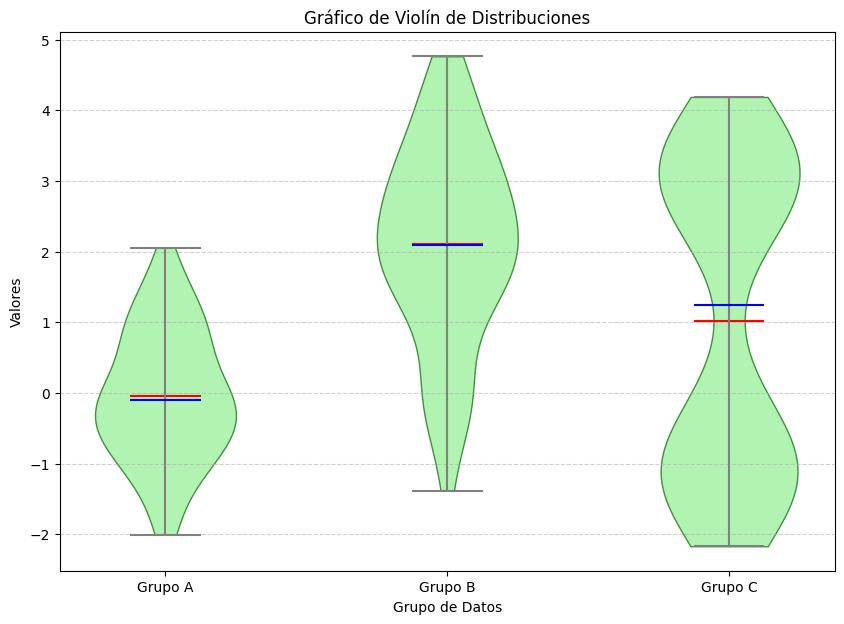

In [4]:
#Datos de ejemplo
data_group1 = np.random.normal(0, 1, 100) #Distribución normal
data_group2 = np.random.normal(2, 1.5, 100) #Otra distribución normal
data_group3 = np.concatenate([np.random.normal(-1, 0.5, 50), np.random.normal(3, 0.5, 50)]) #Distribución bimodal

dataset = [data_group1, data_group2, data_group3]

plt.figure(figsize=(10, 7))
violin_parts = plt.violinplot(dataset,
                              positions=[1, 2, 3], #Posiciones en el eje X
                              showmeans=True,    #Mostrar la media
                              showmedians=True,  #Mostrar la mediana
                              showextrema=True,  #Mostrar los extremos
                              vert=True          #Violines verticales
                             )

#Personalizar el color de los violines
for pc in violin_parts['bodies']:
    pc.set_facecolor('lightgreen')
    pc.set_edgecolor('darkgreen')
    pc.set_alpha(0.7)

#Personalizar las líneas de la media, mediana y extremos
violin_parts['cbars'].set_edgecolor('gray')
violin_parts['cmins'].set_edgecolor('gray')
violin_parts['cmaxes'].set_edgecolor('gray')
violin_parts['cmeans'].set_edgecolor('red') #Color de la media
violin_parts['cmedians'].set_edgecolor('blue') #Color de la mediana

plt.title('Gráfico de Violín de Distribuciones')
plt.xlabel('Grupo de Datos')
plt.ylabel('Valores')
plt.xticks([1, 2, 3], ['Grupo A', 'Grupo B', 'Grupo C'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

## Event Plots

Los gráficos de eventos son útiles para visualizar la ocurrencia de eventos discretos o puntuales a lo largo de uno o más ejes, a menudo en el tiempo. Pueden mostrar múltiples series de eventos de manera compacta. La función `plt.eventplot(positions, **kwargs)` crea un gráfico de eventos.

- `positions`: Un array o lista de arrays, donde cada array contiene las posiciones de los eventos para una serie.
- `orientation`: `'horizontal'` (por defecto) o `'vertical'`.
- `lineoffsets`: Desplazamiento de cada línea de eventos.
- `linelengths`: Longitud de las líneas de los eventos.
- `colors`: Colores para cada serie de eventos.

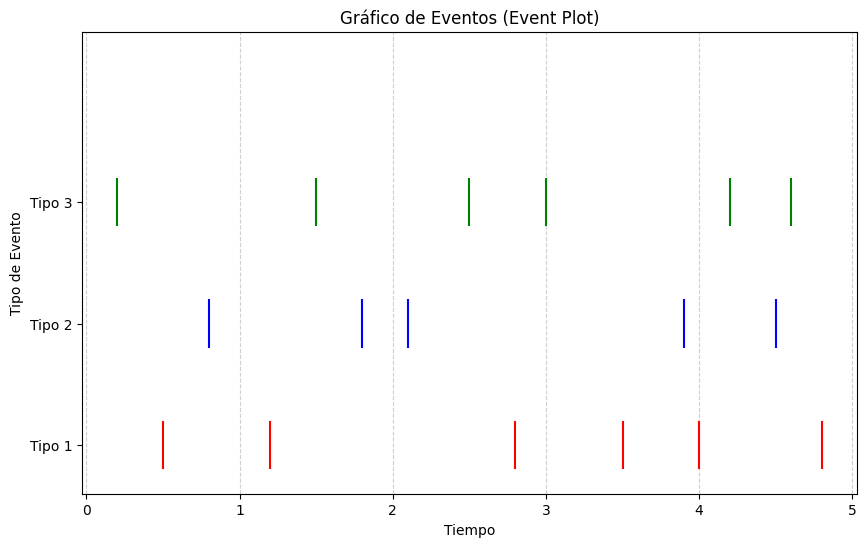

In [ ]:
#Datos de ejemplo
#Tiempo de ocurrencia de diferentes tipos de eventos
event_type1_times = np.array([0.5, 1.2, 2.8, 3.5, 4.0, 4.8])
event_type2_times = np.array([0.8, 1.8, 2.1, 3.9, 4.5])
event_type3_times = np.array([0.2, 1.5, 2.5, 3.0, 4.2, 4.6])

#Podemos pasar una lista de arrays para múltiples series
event_data = [event_type1_times, event_type2_times, event_type3_times]
colors = ['red', 'blue', 'green']
labels = ['Tipo 1', 'Tipo 2', 'Tipo 3']

plt.figure(figsize=(10, 6))

#plt.eventplot asume orientación horizontal por defecto
#Podemos usar lineoffsets para separar las series verticalmente
lineoffsets = np.arange(len(event_data)) * 0.5 #Separar cada línea por 0.5 unidades
linelengths = 0.2 #Longitud de las marcas

plt.eventplot(event_data,
              orientation='horizontal',
              lineoffsets=lineoffsets,
              linelengths=linelengths,
              colors=colors,
              linestyles='solid'
             )

#Añadir etiquetas para cada tipo de evento
plt.yticks(lineoffsets, labels)

plt.title('Gráfico de Eventos (Event Plot)')
plt.xlabel('Tiempo')
plt.ylabel('Tipo de Evento')
plt.ylim(-0.2, len(event_data) * 0.5 + 0.2) #Ajustar límites Y
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

## HeatMaps

La función ``imshow()`` se utiliza para mostrar datos como una imagen en un ráster regular 2D. Se utiliza comúnmente para visualizar imágenes, matrices o mapas de calor donde cada valor de un array corresponde a un color o intensidad.

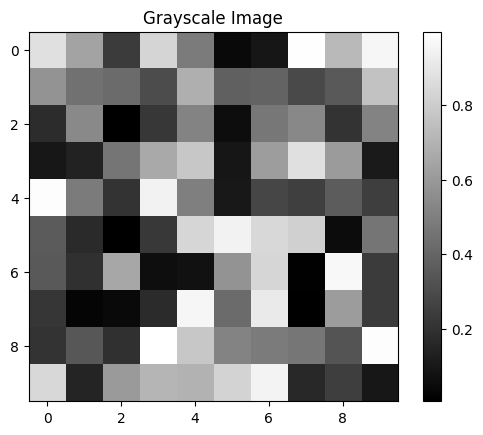

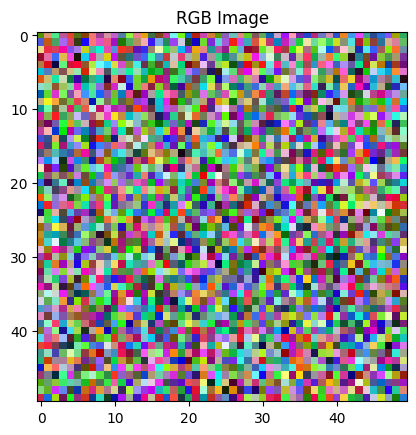

In [6]:
# Create a sample 2D array (e.g., representing a grayscale image)
data = np.random.rand(10, 10)

# Display the data as an image
plt.imshow(data, cmap='gray')
plt.colorbar() # Add a colorbar to show the mapping
plt.title("Grayscale Image")
plt.show()

# Create a sample RGB image
rgb_image = np.random.rand(50, 50, 3) # Random RGB values

# Display the RGB image
plt.imshow(rgb_image)
plt.title("RGB Image")
plt.show()

## Contour Plot

La función `contour()` se utiliza para crear gráficos de contorno, que visualizan superficies 3D dibujando líneas (*contornos*) que conectan puntos de igual altura (*valor Z*) en un plano 2D. Se utiliza comúnmente para representar funciones de dos variables, donde Z es una función de X e Y.

In [ ]:
# Create sample data
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

# Create a contour plot
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

# Add labels to the contours
ax.clabel(CS, inline=True, fontsize=10)

ax.set_title('Contour Plot Example')
plt.show()